AIM 1: Variance and Covariance

1. Load the dataset 'diabetic_data.csv' using pandas
2. Calculate variance on the column 'num_med_proc'
    2.1. For the same column, also calculate standard deviation
    2.2. Do both variance and standard deviation give you the same understanding of the data?
3. Calculate covariance between the columns 'num_med_proc' and 'time_in_hospital'
    3.1. Calculate correlation between the same two variables
    3.2. Do both covariance and correlation give you the same understanding of the data?

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetic_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Calculate covariance
covariance = data['num_med_proc'].cov(data['time_in_hospital'])

# Calculate correlation
correlation = data['num_med_proc'].corr(data['time_in_hospital'])

# Print results
print(f"Covariance between num_med_proc and time_in_hospital: {covariance}")
print(f"Correlation between num_med_proc and time_in_hospital: {correlation}")


   patient_nbr             race  gender      age weight  time_in_hospital  \
0      8222157        Caucasian  Female   [0-10)      ?                 1   
1     55629189        Caucasian  Female  [10-20)      ?                 3   
2     86047875  AfricanAmerican  Female  [20-30)      ?                 2   
3     82442376        Caucasian    Male  [30-40)      ?                 2   
4     42519267        Caucasian    Male  [40-50)      ?                 1   

   num_med_proc  number_diagnoses insulin  
0            42                 1      No  
1            77                 9      Up  
2            29                 6      No  
3            61                 7      Up  
4            59                 5  Steady  
Covariance between num_med_proc and time_in_hospital: 30.983682424578394
Correlation between num_med_proc and time_in_hospital: 0.4396152794861949


AIM 2: Handle data with bimodal distribution. 

1. Create two separate normally distributed data of 100 items. One with mean 2 and the other with -2. Both will have an STD of 1.2
    1.1. You can try different values as well, as long as the result is a bimodal distribution
2. Combine the two datasets using concatenate() from NumPy library
3. Plot the histogram of this bimodal distribution. 
    3.1. You can use whatever library you want
4. Calculate kurtosis and skewness. 
    4.1. You can use whatever library you want. But I suggest you try SciPy's skew() and kurtosis().    

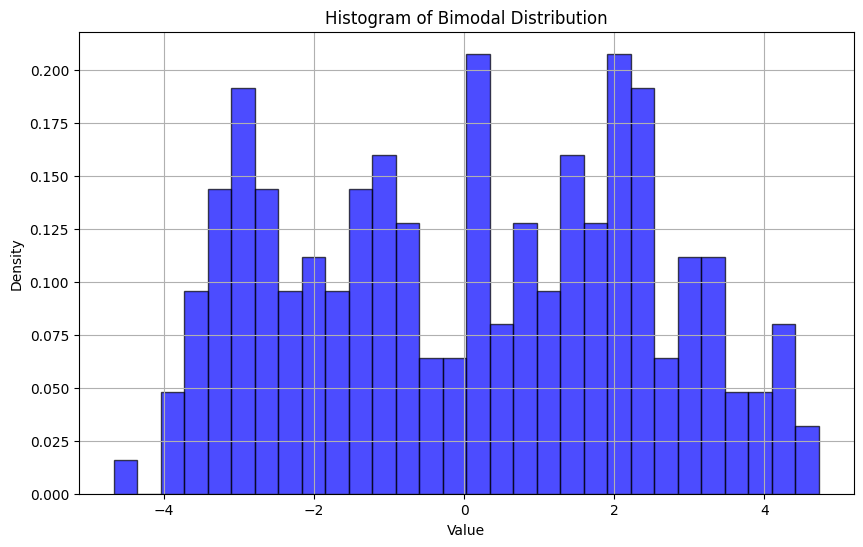

Kurtosis of the bimodal distribution: -1.1475573702929809
Skewness of the bimodal distribution: -0.002338851277759533


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt

# Step 1: Create two normally distributed datasets
np.random.seed(0)  # For reproducibility
data1 = np.random.normal(loc=2, scale=1.2, size=100)  # Mean = 2, STD = 1.2
data2 = np.random.normal(loc=-2, scale=1.2, size=100)  # Mean = -2, STD = 1.2

# Step 2: Combine the two datasets
bimodal_data = np.concatenate((data1, data2))

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(bimodal_data, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()
plt.show()

# Step 4: Calculate kurtosis and skewness
kurt = kurtosis(bimodal_data)
skewness = skew(bimodal_data)

# Print the results
print(f"Kurtosis of the bimodal distribution: {kurt}")
print(f"Skewness of the bimodal distribution: {skewness}")


AIM 3: Test normality for the generated bimodal distribution

1. Visualize the given data with a Q-Q plot
2. Compute its normality using Shapiro-Wilk test
    2.1. Is the data normal? Why and how did you decide that? 
3. Repeat the normality test, but this time using Anderson-Darling Test
    3.1. Is the data normal? Why and how did you decide that?

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, shapiro, anderson
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Create two normally distributed datasets
np.random.seed(0)  # For reproducibility
data1 = np.random.normal(loc=2, scale=1.2, size=100)  # Mean = 2, STD = 1.2
data2 = np.random.normal(loc=-2, scale=1.2, size=100)  # Mean = -2, STD = 1.2

# Step 2: Combine the two datasets
bimodal_data = np.concatenate((data1, data2))

# Step 3: Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(bimodal_data, line='s')
plt.title('Q-Q Plot of Bimodal Distribution')
plt.show()

# Step 4: Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(bimodal_data)

# Print Shapiro-Wilk results
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("The data is not normally distributed (reject H0).")
else:
    print("The data is normally distributed (fail to reject H0).")

# Step 5: Anderson-Darling Test
anderson_result = anderson(bimodal_data, dist='norm')

# Print Anderson-Darling results
print(f"Anderson-Darling Test Statistic: {anderson_result.statistic:.4f}")
print("Critical Values:")
for i in range(len(anderson_result.critical_values)):
    print(f"At significance level {anderson_result.significance_level[i]}: {anderson_result.critical_values[i]:.4f}")

if anderson_result.statistic > anderson_result.critical_values[2]:  # 5% significance level
    print("The data is not normally distributed (reject H0).")
else:
    print("The data is normally distributed (fail to reject H0).")




ModuleNotFoundError: No module named 'statsmodels'

AIM 4: Repeat AIM 2 and AIM 3 steps for normal data

1. Generate normally distirbuted data of 100 data items
2. Visualize it using Q-Q plot
3. Perform both Shapiro-Wilk and Anderson-Darling test on this data
    3.1. What from these tests tells you that the data is normal?
4. What happens when the data items is reduced to 30?

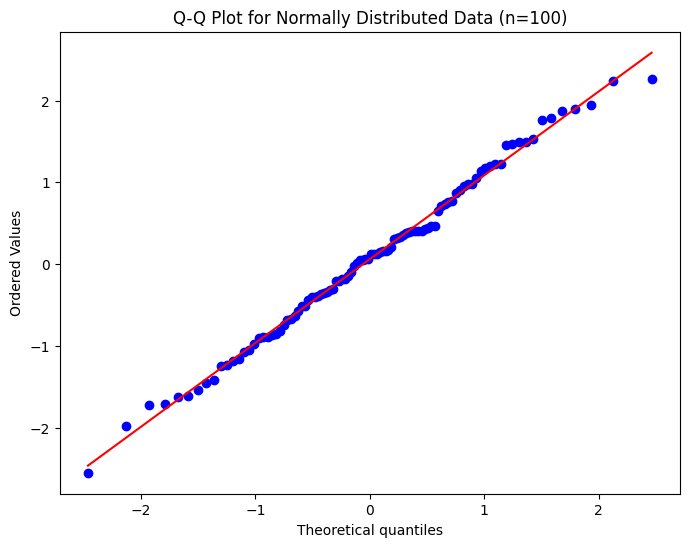

Shapiro-Wilk Test: Statistic=0.9926937818527222, p-value=0.8689165711402893
Anderson-Darling Test: Statistic=0.18097695613924714, Critical Values=[0.555 0.632 0.759 0.885 1.053], Significance Levels=[15.  10.   5.   2.5  1. ]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats

# Generate normally distributed data
np.random.seed(0)  # For reproducibility
data_normal = np.random.normal(loc=0, scale=1, size=100)  # mean=0, std=1

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data_normal, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normally Distributed Data (n=100)')
plt.show()

# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(data_normal)
print(f'Shapiro-Wilk Test: Statistic={shapiro_stat}, p-value={shapiro_p}')

# Anderson-Darling test
anderson_result = stats.anderson(data_normal)
print(f'Anderson-Darling Test: Statistic={anderson_result.statistic}, Critical Values={anderson_result.critical_values}, Significance Levels={anderson_result.significance_level}')



AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

Unique values in 'race' column: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


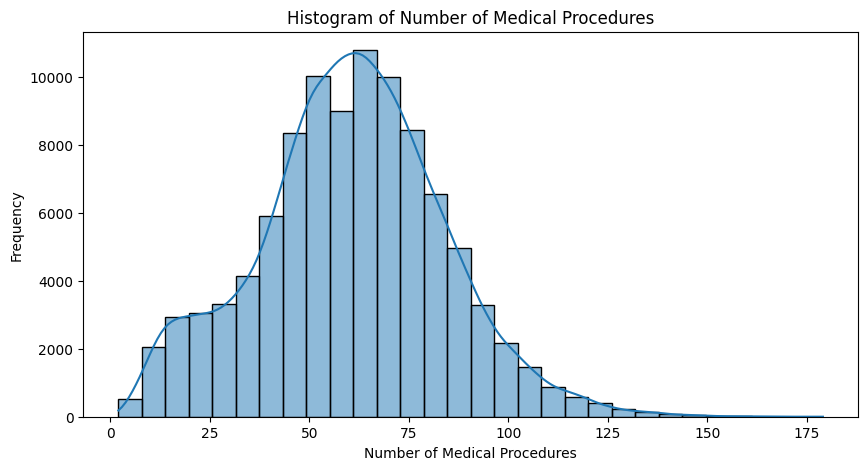

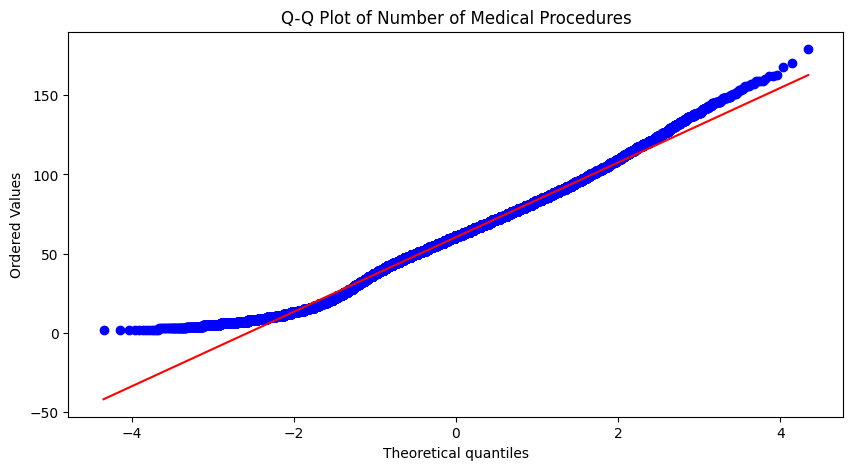

Anderson-Darling Test Statistic: 96.61245024697564
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]


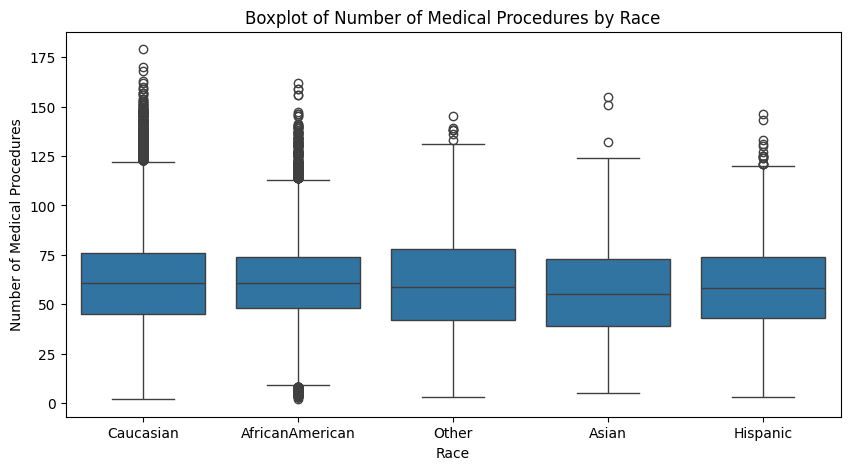

ANOVA Test Statistic: 12.454717826440145, p-value: 3.962106548933667e-10
Kruskal-Wallis Test Statistic: 52.17798202426288, p-value: 1.2661582646035497e-10


In [12]:
from scipy.stats import kruskal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step 1: Load the dataset
data = pd.read_csv('diabetic_data.csv')

# Step 2: Find unique values under the 'race' column
unique_races = data['race'].unique()
print("Unique values in 'race' column:", unique_races)

# Step 3: Visualize the continuous variable using histogram and Q-Q plot
# Choose a continuous variable, e.g., 'num_med_proc'

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['num_med_proc'], bins=30, kde=True)
plt.title('Histogram of Number of Medical Procedures')
plt.xlabel('Number of Medical Procedures')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(data['num_med_proc'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Number of Medical Procedures')
plt.show()

# Step 4: Anderson-Darling test for normality
anderson_result = stats.anderson(data['num_med_proc'])
print(f'Anderson-Darling Test Statistic: {anderson_result.statistic}')
print(f'Critical Values: {anderson_result.critical_values}')
print(f'Significance Levels: {anderson_result.significance_level}')

# Step 5: Boxplot of 'num_med_proc' by 'race'
plt.figure(figsize=(10, 5))
sns.boxplot(x='race', y='num_med_proc', data=data)
plt.title('Boxplot of Number of Medical Procedures by Race')
plt.xlabel('Race')
plt.ylabel('Number of Medical Procedures')
plt.show()

# Step 5.2: Hypotheses
# H0 (Null Hypothesis): There is no difference in the average number of medical procedures among different races.
# Ha (Alternative Hypothesis): There is a difference in the average number of medical procedures among different races.

# Step 6: Perform ANOVA
anova_result = stats.f_oneway(
    *[group['num_med_proc'].values for name, group in data.groupby('race')]
)

print(f'ANOVA Test Statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

# Step 7: Perform Kruskal-Wallis Test
kruskal_result = stats.kruskal(
    *[group['num_med_proc'].values for name, group in data.groupby('race')]
)

print(f'Kruskal-Wallis Test Statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}')

# Step 8: Conclusions
# You can interpret the results based on the p-values obtained from the ANOVA and Kruskal-Wallis tests.



